In [1]:
# 欠拟合和过拟合对模型的影响
# 第k个模型指什么？
# 横坐标k
# bias
# variance
# MSE
# 用这张图说明欠拟合和过拟合在预测上的影响

In [2]:
# k越大，可是p1
# for p1 in range(1000):
import numpy as np

In [3]:
#构造数据
import numpy as np
M=100
x_matrix=[]
y_vector=[]
for i in range(M):#这里M是重复次数
    x=np.random.randn(10)
    err=np.random.randn(10)
    beta=np.ones(10)
    x_vector=x
    x_matrix.append(x_vector)
    y=np.dot(x,beta)+np.random.normal(0, 3, 1)# epsilon的方差设置成可调的参数,这里方差取的3，为test的作用
    y_vector.append(y[0])

In [4]:
def get_train(p):
    N=100
    x_matrix=[]
    y_vector=[]
    for i in range(N):#这里M是重复次数
        x=np.random.randn(p)
        err=np.random.randn(p)
        beta=np.ones(p)#这里beta取1
        x_matrix.append(x)
        y=np.dot(x,beta)+np.random.normal(0, 3, 1)# epsilon的方差设置成可调的参数,这里方差取的3，为test的作用
        y_vector.append(y[0])
    return x_matrix,y_vector

In [ ]:
def get_test(p):
    N=100
    x_matrix_test=[]
    y_vector_test=[]
    for i in range(N):#这里M是重复次数
        x=np.random.randn(p)
        err=np.random.randn(p)
        beta=np.ones(p)#这里beta取1
        x_matrix.append(x)
        y=np.dot(x,beta)+np.random.normal(0, 3, 1)# epsilon的方差设置成可调的参数,这里方差取的3，为test的作用
        y_vector.append(y[0])
    return x_matrix,y_vector

In [5]:
# #构造数据
# import numpy as np
# M=100
# beta=np.ones(10)
# x_matrix_test=[]
# y_vector_test=[]
# for i in range(M):#这里M是重复次数
#     x=np.random.randn(10)
#     err=np.random.randn(10)
#     x_vector=x
#     x_matrix_test.append(x_vector)
#     y=np.dot(x,beta)+np.random.normal(0, 3, 1)# epsilon的方差设置成可调的参数,这里方差取的3，为test的作用
#     y_vector_test.append(y[0])

In [6]:
def get_yhat(x_matrix,y_vector,x_matrix_test):
    x_tran=np.transpose(x_matrix)
    tmp_dot=np.dot(x_tran,x_matrix)
    inverse = np.linalg.inv(tmp_dot)
    beta_hat=np.dot(inverse,x_tran)
    beta_hat=np.dot(beta_hat,y_vector)
    y_hat=np.dot(x_matrix,beta_hat)
    return y_hat

In [7]:
y_hat=get_yhat(x_matrix,y_vector,x_matrix_test)
y_hat.shape

(100,)

In [8]:
#真实的y
#期望用均值去代
# 期望（均值）-真实值
# 

In [9]:
def get_bias(y_hat,y_vector_test,x_matrix_test):
    bias=0
    y_mean=np.mean(y_hat)
    y_real=np.dot(x_matrix_test,beta)
    # print(y_real.shape) 
    for y in y_real:
        bias=bias+(y-y_mean)**2
    return bias

In [10]:
bias=get_bias(y_hat,y_vector_test,x_matrix_test)
print(bias)

1086.3041999950572


In [11]:
#样本方差与
def get_var(y_hat):
    return np.var(y_hat)

In [12]:
var=get_var(y_hat)
print(var)

12.572512709554788


In [13]:
def get_mse(y_hat,y_vector_test,x_matrix_test):
    sum=0
    y_real=np.dot(x_matrix_test,beta)
    for i,j in zip(y_hat,y_real):
        sum=sum+(i-j)**2
    return sum/len(y_hat)

In [14]:
mse=get_mse(y_hat,y_vector_test,x_matrix_test)
print(mse)

20.542737046924415


In [15]:
bia=[]
va=[]
ms=[]

for p in range(50):
    beta=np.ones(p)
    x_matrix,y_vector=get_train(p)
    y_hat=get_yhat(x_matrix,y_vector,x_matrix_test)
    x_matrix_test,y_vector_test=get_train(p)
    bias=get_bias(y_hat,y_vector_test,x_matrix_test)
    bia.append(bias)
    var=get_var(y_hat)
    va.append(var)
    mse=get_mse(y_hat,y_vector_test,x_matrix_test)
    ms.append(mse)

In [16]:
p=np.linspace(1,20,20)
p

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

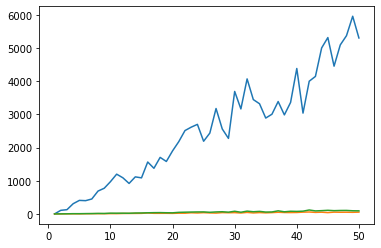

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
p=np.linspace(1,50,50)
plt.plot(p,bia)
plt.plot(p,va)
plt.plot(p,ms)
plt.legend
plt.show()